## Data Processing
*Data Preprocessing is a technique that is used to convert the raw data into a clean data set, preparing it and making it suitable for a machine learning model.*

*This is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.*


##### Below are the steps involved to understand, clean and prepare the data:

    
>Variable Identification
>
>Handling Null Values
>
>Handling Redundancy in data
>
>Handling Outliers
>
>Exploratory Data Analysis
>
>Feature Engineering
>
>Feature Selection


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option("display.max.columns", 500)
pd.set_option('display.max_rows', 500)
pd.set_option("display.precision", 2)

In [3]:
data = pd.read_csv("C:\\Users\\dgera\\Downloads\\Titanic.csv")

In [4]:
data['new']=np.nan
data['new1']=1
data = data.append(pd.Series(), ignore_index=True)
data = data.append(data.iloc[890,:])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
data.shape

(893, 14)

## Variable identification

*First identify type of variable, i.e. Predictor (Input) and Target (output) variables. Next, identify the data type and category of the variables.*

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'new', 'new1'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  892 non-null    float64
 1   Survived     892 non-null    float64
 2   Pclass       892 non-null    float64
 3   Name         892 non-null    object 
 4   Gender       892 non-null    object 
 5   Age          715 non-null    float64
 6   SibSp        892 non-null    float64
 7   Parch        892 non-null    float64
 8   Ticket       892 non-null    object 
 9   Fare         892 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     890 non-null    object 
 12  new          0 non-null      float64
 13  new1         892 non-null    float64
dtypes: float64(9), object(5)
memory usage: 104.6+ KB


In [8]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Gender           2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
new              0
new1             1
dtype: int64

## Handling Null Values

*Missing values in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.*

##### Steps for handling null values includes:

>Identification of columns with missing values
>
>Dropping the data with missing values
>
>Imputing the missing values

### Identification of columns with missing values

In [9]:
data.isnull().sum()

PassengerId      1
Survived         1
Pclass           1
Name             1
Gender           1
Age            178
SibSp            1
Parch            1
Ticket           1
Fare             1
Cabin          689
Embarked         3
new            893
new1             1
dtype: int64

In [10]:
print( "total null values: ", data.isnull().sum().sum())

total null values:  1773


In [11]:
data.isnull().sum()/len(data)*100

PassengerId      0.11
Survived         0.11
Pclass           0.11
Name             0.11
Gender           0.11
Age             19.93
SibSp            0.11
Parch            0.11
Ticket           0.11
Fare             0.11
Cabin           77.16
Embarked         0.34
new            100.00
new1             0.11
dtype: float64

In [12]:
data.shape

(893, 14)

### Dropping the data with missing values

In [13]:
data.shape

(893, 14)

In [14]:
## Drop rows which contain missing values in all the columns

data.dropna(axis=0,how='all',inplace=True)
data.shape

(892, 14)

In [15]:
## Drop columns which contain missing values in all the rows

data.dropna(axis=1,how='all',inplace=True)
data.shape

(892, 13)

In [16]:
## Drop columns which contain more than 30% missing values

data.drop(data.columns[data.isnull().sum()/len(data)>0.30],axis=1,inplace=True)
data.shape

(892, 12)

### Imputing the missing values

In [17]:
## Imputing the whole dataframe with 0

data.fillna(0)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,new1
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,S,1.0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.28,C,1.0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.92,S,1.0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.10,S,1.0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.05,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.00,S,1.0
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1.0,2.0,W./C. 6607,23.45,S,1.0
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.00,C,1.0
890,891.0,0.0,3.0,"Dooley, Mr. Patrick",male,32.0,0.0,0.0,370376,7.75,Q,1.0


In [18]:
data.Age.sum()

21237.17

In [19]:
data.fillna(0).Age.sum()

21237.17

### Imputing the missing values for numerical columns
*Numeric variables can be imputed by mean, median, mode or any other kind of random imputation depending on the data and the use case*

In [20]:
## Imputing Age with median

data.fillna({'Age':data.Age.median()},inplace=True)

In [21]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
new1           0
dtype: int64

### Imputing the missing values for categorical columns
*Categorical variables are imputed by mode*

In [22]:
def categorical_imputation(df):
    cat_col = list(df.select_dtypes(include = ['object']))
    print("Categorical Columns are :", cat_col)
    for i in cat_col:
        print("Mode of column", i, ":", df[i].mode()[0])
        df[i]=df[i].fillna(df[i].mode()[0])
    return df

In [23]:
data1 = categorical_imputation(data)

Categorical Columns are : ['Name', 'Gender', 'Ticket', 'Embarked']
Mode of column Name : Dooley, Mr. Patrick
Mode of column Gender : male
Mode of column Ticket : 1601
Mode of column Embarked : S


In [24]:
data1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
new1           0
dtype: int64

##### Using ffill/bfill method

In [25]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [26]:
df.fillna(method='ffill')

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5
3,3.0,3.0,NaN,4


## Handling Redundancy in data 

*There can be redundancy in the data which needs to be handled.*

##### This includes

>Change of data type
>
>Removing duplicate rows
>
>Removing single valued columns


### Change of data type

*There may be wrong data type imported while reading the data or may be we want to treat some variable differently. Therefore change in the data type is required*

In [27]:
data.dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Name            object
Gender          object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Embarked        object
new1           float64
dtype: object

In [28]:
# Note : Int type doesn't support null values

convert_dict = {'Age': np.float32} 
data_1 = data.astype(convert_dict) 


### Removing duplicate rows

In [29]:
np.nan==np.nan

False

In [30]:
data1

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,new1
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,S,1.0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.28,C,1.0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.92,S,1.0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.10,S,1.0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.05,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.00,S,1.0
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1.0,2.0,W./C. 6607,23.45,S,1.0
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.00,C,1.0
890,891.0,0.0,3.0,"Dooley, Mr. Patrick",male,32.0,0.0,0.0,370376,7.75,Q,1.0


In [31]:
data1.drop_duplicates(keep='first',inplace = True)
data1.shape

(891, 12)

### Removing single valued columns

In [32]:
data1.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Gender           2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
new1             1
dtype: int64

In [33]:
data2 = data1[[c for c in list(data1) if len(data1[c].unique()) > 1]]

In [34]:
data2.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Gender           2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

### Handling Outliers

*Outlier is an observation that appears far away and diverges from an overall pattern in a sample.Data outliers can deceive the training process resulting in longer training times and less accurate models.* 

*In some cases, the presence of outliers are informative and will require further study. For example, outliers are important in use-cases related to transaction management where an outlier might be used to identify potentially fraudulent transactions.*

**Handling Outliers include:**
>Outlier detection
>
>Outlier Treatment

### Outlier Detection 
*Detecting outliers or anomalies is one of the core problems in data mining. The emerging expansion and continued growth of data and the spread of IoT devices, make us rethink the way we approach anomalies and the use cases that can be built by looking at those anomalies.*

*Smart watches and wristbands that can detect our heartbeats every few minutes. Detecting anomalies in the heartbeat data can help in predicting heart diseases. Anomalies in traffic patterns can help in predicting accidents. It can also be used to identify bottlenecks in network infrastructure and traffic between servers. Hence, the use cases and solution built on top of detecting anomalies are limitless.*

*Another reason why we need to detect anomalies is that when preparing datasets for machine learning models, it is really important to detect all the outliers and either get rid of them or analyze them to know why you had them there in the first place.*

**Few of the Outlier Detection Methods are:**

>Z-score(Parametric)
>
>Extreme Value Analysis(Parametric)
>
>Clustering based approach(Non Parametric)
>
>Tree based approach(Non Parametric)

### Z-score 
*The z-score or standard score of an observation is a metric that indicates how many standard deviations a data point is from the sample’s mean, assuming a Gaussian distribution. In case of a Gaussian Distribution, the outliers will lie outside the mean plus or minus 3 times the standard deviation of the variable (Z-score of 3 or -3).*

In [35]:
# Seperating the taret variable

data2.columns
Target = data2['Survived']
data_x = data2.loc[:, data2.columns != 'Survived']

In [36]:
# Seperating the numeric variables

data_x.select_dtypes(exclude = ['object']).dtypes       

PassengerId    float64
Pclass         float64
Age            float64
SibSp          float64
Parch          float64
Fare           float64
dtype: object

In [37]:
data_num = data_x.select_dtypes(exclude = ['object'])

In [38]:
from scipy import stats
stats.zscore(data_num)

array([[-1.73010796,  0.82737724, -0.56573646,  0.43279337, -0.47367361,
        -0.50244517],
       [-1.72622007, -1.56610693,  0.66386103,  0.43279337, -0.47367361,
         0.78684529],
       [-1.72233219,  0.82737724, -0.25833709, -0.4745452 , -0.47367361,
        -0.48885426],
       ...,
       [ 1.72233219,  0.82737724, -0.1046374 ,  0.43279337,  2.00893337,
        -0.17626324],
       [ 1.72622007, -1.56610693, -0.25833709, -0.4745452 , -0.47367361,
        -0.04438104],
       [ 1.73010796,  0.82737724,  0.20276197, -0.4745452 , -0.47367361,
        -0.49237783]])

In [39]:
pd.DataFrame(np.abs(stats.zscore(data_num)) > 3,columns=[data_num.columns])

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
886,False,False,False,False,False,False
887,False,False,False,False,False,False
888,False,False,False,False,False,False
889,False,False,False,False,False,False


### Extreme Value Analysis
*If the data point is above the upper boundary or below the lower boundary, it can be considered as an outlier.*

>Upper Boundary = 75th quantile +(IQR * 1.5)
>
>Lower Boundary = 25th quantile - (IQR * 1.5)

#### Boxplots:
The lower and upper whiskers are the boundaries of the data distribution. Any data points that show above or below the whiskers, can be considered outliers or anomalous. 

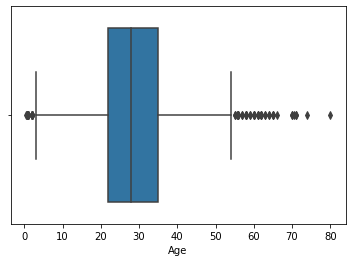

In [40]:
sns.boxplot(x=data1["Age"])
plt.show()

### Clustering based approach
Clustering is a popular technique used to group similar data points or objects in groups or clusters. It can also be used as an important tool for outlier detection. Example: DBSCAN, k-means clustering etc .

>**Pros:** Can be used for multidimensional also.
>
>**Cons:** Sometimes it needs calibration or scaling


In [41]:
# using sklearn kmeans

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_num[['Age','Fare']].values)
clusters = kmeans.labels_

In [42]:
print(list(clusters).count(0))
print(list(clusters).count(1))

838
53


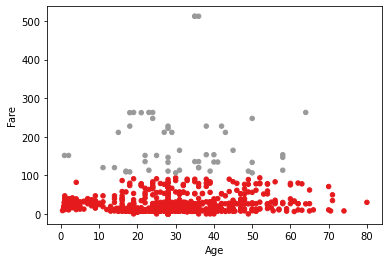

In [43]:
from matplotlib import cm
cmap = cm.get_cmap('Set1')
data_num.plot.scatter(x='Age', y='Fare',c=clusters, cmap=cmap,colorbar = False);

In [44]:
# pyod library provides access to more than 20 different algorithms to detect outliers .
# knn is a supervised algorithm while pyod implements the unsupervised knn for outlier detection

from pyod.models.knn import KNN
clf_name = 'KNN'
clf = KNN()
clf.fit(data_num[['Age','Fare']])

# get the prediction labels and outlier scores of the training data
cluster = clf.labels_  # binary labels (0: inliers, 1: outliers)
scores = clf.decision_scores_  # raw outlier scores



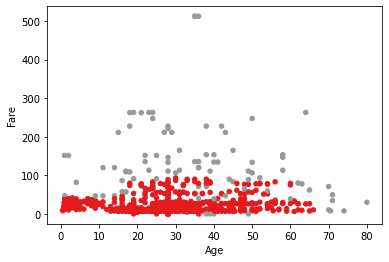

In [45]:
from matplotlib import cm
cmap = cm.get_cmap('Set1')
data_num.plot.scatter(x='Age', y='Fare',c=cluster, cmap=cmap,colorbar = False);

### Tree based approach (Isolation Forest)
*Isolation forest’s basic principle is that outliers are few and far from the rest of the observations. To build a tree (training), the algorithm randomly picks a feature from the feature space and a random split value ranging between the maximums and minimums. This is made for all the observations in the training set. To build the forest a tree ensemble is made averaging all the trees in the forest.*

In [46]:
# Returns -1 for outliers and 1 for inliers.
#contamination- the proportion of outliers in the data set.

from sklearn.ensemble import IsolationForest
import numpy as np

clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(data_num)
list(preds).count(-1)

C:\Users\dgera\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


291

### Outlier treatment

**Methods of Outlier Treatment:**

>Mean/Median or random Imputation
>
>Trimming
>
>Capping
>
>Discretization

### Mean/Median or random Imputation
*If we have reasons to believe that outliers are due to mechanical error or problems during measurement. That means, the outliers are in nature similar to missing data, then any method used for missing data imputation can be used to replace outliers. The number of outliers is small (otherwise they won't be called outliers) and it's reasonable to use mean/median/random imputation to replace them.*

In [47]:
# replacing Age outlier with median. Use inplace=True to reflect the changes in the original data frame
# Repeat this procedure for every column and decide which value to be used to replace the outlier

data2['Age'].where((np.abs(stats.zscore(data_num['Age'])) > 3),data2['Age'].median())

0      28.0
1      28.0
2      28.0
3      28.0
4      28.0
       ... 
886    28.0
887    28.0
888    28.0
889    28.0
890    28.0
Name: Age, Length: 891, dtype: float64

### Trimming:
*In this method, we discard the outliers completely i.e. drop the rows which have the outliers.*

In [48]:
# Dropping rows which has value in any column with zscore>3

data2[(np.abs(stats.zscore(data_num)) < 3).all(axis=1)]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.28,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.92,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.10,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.05,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.00,S
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.00,S
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1.0,2.0,W./C. 6607,23.45,S
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.00,C


### Capping
*That is, all values above and below a certain threshold, are capped to that threshold respectively.*

In [49]:
# Capped the lower and upper thresold with minimum and maximum of the box plot distribution (whiskers)

def outlier_Treatment(df):
    num_col = list(df.select_dtypes(exclude = ['object']))
    for i in num_col:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV = Q1 - 1.5 * IQR
        UTV = Q3 + 1.5 * IQR
        df[i] = df[i].clip(LTV,UTV)
    return df

In [50]:
pd.options.mode.chained_assignment = None
data_olt = outlier_Treatment(data_x)

### Discretization
*Discretization is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that spans the range of the variable’s values. Thus, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval/bucket.*

*This is also called binning. This is covered in the feature engineering session.*

## Exploratory Data Analysis

*Exploratory data analysis (EDA) is an approach for analyzing dataset to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.*

##### EDA or data cleaning what to do first
*It really depends how comprehensible the data is and what your goals are. Sometime visualizing the data helps you to detect* what to clean or preprocess, sometimes cleaning the data first gives you a better presentation. Also if your data has high number of dimensions then doing EDA for each variable is impractical.

##### Types of Analysis
>Univariate analysis
>
Bivariate analysis

### Univariate Analysis

In [51]:
## Describe works only for numerical data

data2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.36,0.52,0.38,32.20
std,257.35,0.49,0.84,13.02,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,22.00,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,35.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


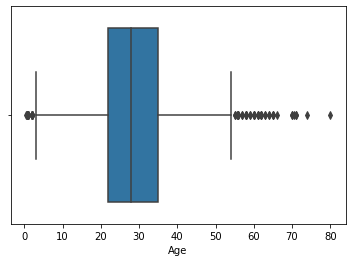

In [52]:
## Boxplot

sns.boxplot(x=data2["Age"])
plt.show()

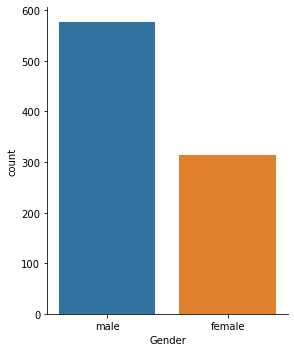

In [53]:
# categorical Bar plot

sns.catplot(x='Gender', kind='count', data=data2,aspect=.8);

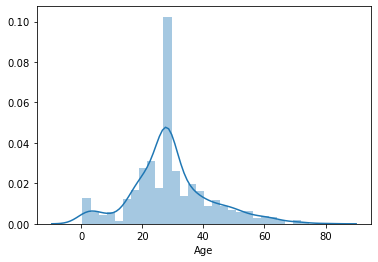

In [54]:
## Histogram

sns.distplot(data2['Age']);

### Bivariate Analysis

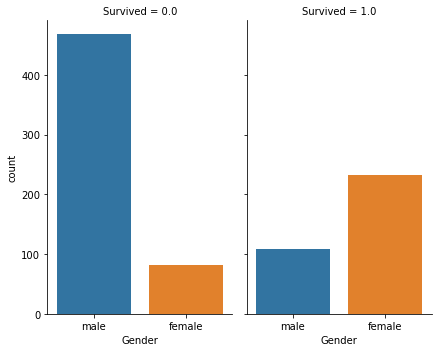

In [55]:
## Cateorical Feature Bar plot w.r.t. Target

sns.catplot(x='Gender', col='Survived', kind='count', data=data2,aspect=.6);

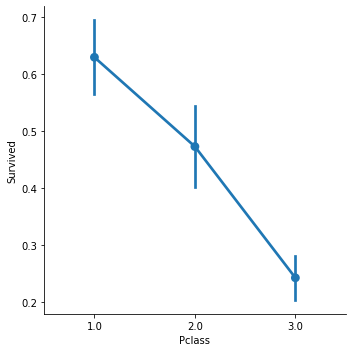

In [56]:
#Cateorical Features plot w.r.t. Target

sns.catplot('Pclass','Survived', kind='point', data=data2);

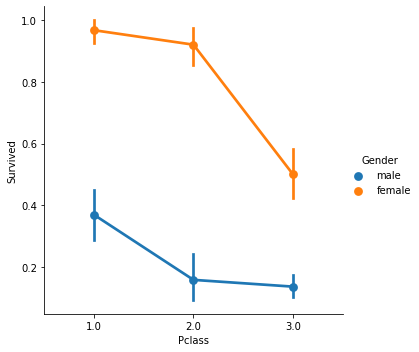

In [57]:
## Cateorical Features plot w.r.t. Target

sns.catplot('Pclass','Survived',hue='Gender', kind='point', data = data2);

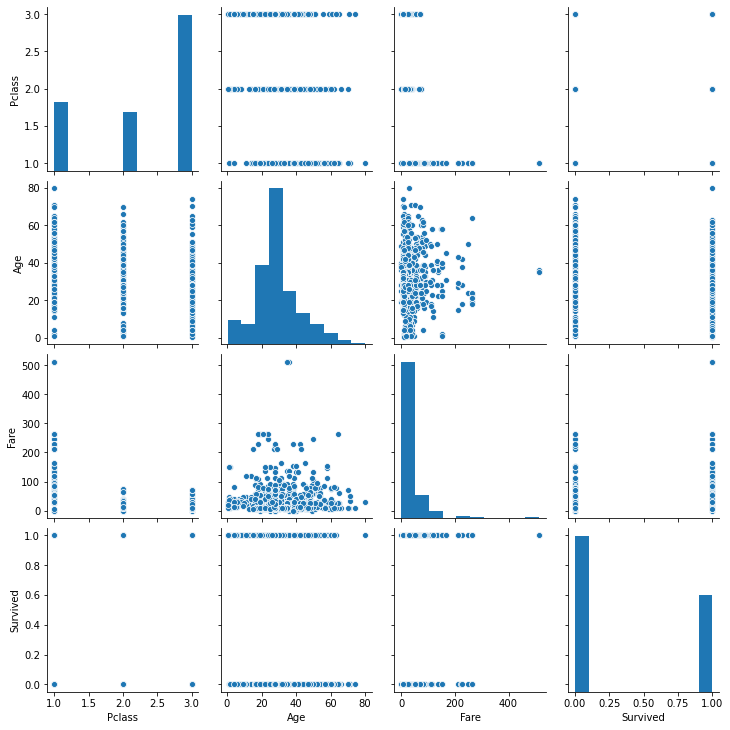

In [58]:
## pairplot plot a pairwise relationships in a dataset

sns.pairplot(data2, vars = ['Pclass','Age','Fare','Survived'] );

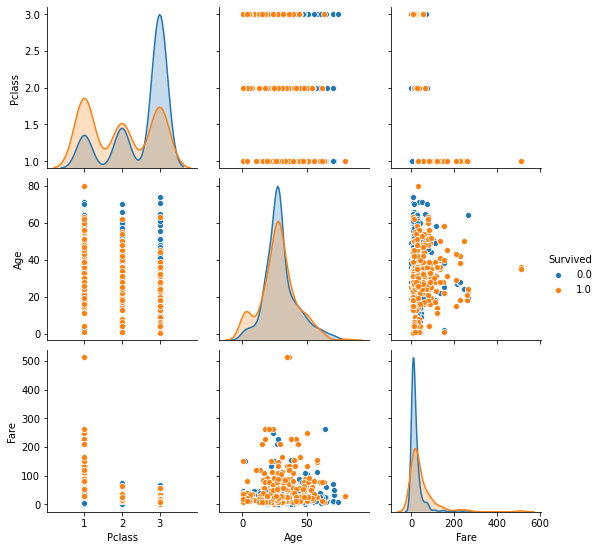

In [59]:
## pairplot w.r.t. target variable

sns.pairplot(data2, vars = ['Pclass','Age','Fare'], hue = 'Survived' );

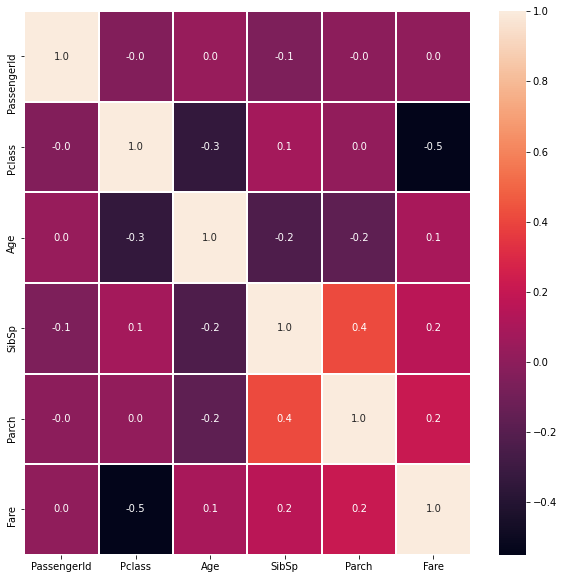

In [60]:
## Heatmap to visualize correlation between variables

plt.figure(figsize= (10,10))
sns.heatmap(data2.loc[:, data2.columns != 'Survived'].corr(),annot=True,fmt='.1f',linewidths=1,linecolor='white',cbar=True);

In [61]:
## Crosstab

pd.crosstab(data2.Pclass, data2.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0.0,1.0,All
Pclass,,,
1.0,80,136,216
2.0,97,87,184
3.0,372,119,491
All,549,342,891


## Feature Engineering
*Feature engineering is the process of using domain knowledge of the data to **create new features or transforming the existing features** that make machine learning algorithms perform more accurately. Feature engineering is fundamental to the application of machine learning and is both difficult and expensive.*

>**Feature Creation** includes creating derived varible, dummy variable, creating variables from date like day, month etc.
>
>**Feature transformation** include square root, cube root, logarithmic, binning, scaling etc.

##### We Will cover the following feature engineering techniques:
>Creating Bins for continuous variable
>
>Encoding Categorical Variable
>
>Creating new features
>
>Creating features from datetime
>
>Handling skewness
>
>Data Normalization

### Creating Bins for continuous variable
*Binning can be done in two ways i.e. using the actual range or using the or basis of the distribution like decile, quantile etc.*

In [62]:
# Binning Age columns using range of Age

pd.cut(data2.Age, bins=4, retbins=True ,labels=False)

(0      1
 1      1
 2      1
 3      1
 4      1
       ..
 886    1
 887    0
 888    1
 889    1
 890    1
 Name: Age, Length: 891, dtype: int64,
 array([ 0.34042, 20.315  , 40.21   , 60.105  , 80.     ]))

In [63]:
# Binning Age column on basis of quantiles

pd.qcut(data2.Age, q=4, retbins = True,labels=False )

(0      0
 1      3
 2      1
 3      2
 4      2
       ..
 886    1
 887    0
 888    1
 889    1
 890    2
 Name: Age, Length: 891, dtype: int64,
 array([ 0.42, 22.  , 28.  , 35.  , 80.  ]))

In [64]:
data2.Age.quantile([0.25,0.5,0.75])

0.25    22.0
0.50    28.0
0.75    35.0
Name: Age, dtype: float64

In [65]:
# while creating new column retbins = True option can't be used

data2.loc[:,'Age_bins'] = pd.cut(data2.Age, bins=4,labels=False)

### Encoding Categorical Variable
*The purpose of encoding variable or creating dummy variable is to convert categorical variable into numerical variables so that it is understandable by the models*

*Categorical data is of two types. Categorical data that are having any intrinsic ordering among themselves are called **Ordinal** type Eg. Low, Medium, High. Categorical data which don’t have any intrinsic ordering among themselves are called **Nominal** type.*

##### One Hot Encoding using pandas

In [66]:
# encoding all the categories

pd.get_dummies(data2, columns = ['Gender'], prefix=['Gender'],drop_first=False).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_bins,Gender_female,Gender_male
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",22.0,1.0,0.0,A/5 21171,7.25,S,1,0,1
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,71.28,C,1,1,0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",26.0,0.0,0.0,STON/O2. 3101282,7.92,S,1,1,0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,53.10,S,1,1,0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",35.0,0.0,0.0,373450,8.05,S,1,0,1


In [67]:
# encoding n categories to n-1 variables to avoid dummy variable trap

data_dum = pd.get_dummies(data2, columns = ['Gender'], prefix=['Gender'],drop_first=True)
data_dum.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_bins,Gender_male
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",22.0,1.0,0.0,A/5 21171,7.25,S,1,1
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,71.28,C,1,0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",26.0,0.0,0.0,STON/O2. 3101282,7.92,S,1,0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,53.10,S,1,0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",35.0,0.0,0.0,373450,8.05,S,1,1


##### One Hot Encoding using sklearn

In [68]:
from sklearn.preprocessing import OneHotEncoder
drop_enc = OneHotEncoder(drop='first').fit(data2['Gender'].values.reshape(-1,1))
drop_enc.categories_

[array(['female', 'male'], dtype=object)]

In [69]:
pd.DataFrame(drop_enc.transform(data2['Gender'].values.reshape(-1,1)).toarray())

,0
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
886,1.0
887,0.0
888,0.0
889,1.0


##### Label Binarizer
*It is also type of one hot encoding but it works for a single variable at a time only*

In [70]:
df = pd.DataFrame({'State':['UP','Haryana','Punjab'], 'Capital':['Lucknow','Chandigarh','Chandigarh']})
df

,State,Capital
0,UP,Lucknow
1,Haryana,Chandigarh
2,Punjab,Chandigarh


In [71]:
df.values

array([['UP', 'Lucknow'],
       ['Haryana', 'Chandigarh'],
       ['Punjab', 'Chandigarh']], dtype=object)

In [72]:
from sklearn.preprocessing import LabelBinarizer
lb_binary = LabelBinarizer()
pd.DataFrame(lb_binary.fit_transform(df['State']),columns = lb_binary.classes_)


,Haryana,Punjab,UP
0,0,0,1
1,1,0,0
2,0,1,0


In [73]:
lb_binary.classes_

array(['Haryana', 'Punjab', 'UP'], dtype='<U7')

##### OrdinalEncoder using sklearn

In [74]:
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder()
X = data2['Gender'].values.reshape(-1, 1)
data2['gend_ordinal'] = ordinal.fit_transform(X)
data2[['Gender','gend_ordinal']].head()

,Gender,gend_ordinal
0,male,1.0
1,female,0.0
2,female,0.0
3,female,0.0
4,male,1.0


In [75]:
df = pd.DataFrame({'State':['UP','Haryana','Punjab'], 'Capital':['Lucknow','Chanigarh','Chanigarh']})
ordinal.fit_transform(df.values)

array([[2., 1.],
       [0., 0.],
       [1., 0.]])

##### Ordinal Encoder doesn't consider the intentional or true order, for that we need to do manual coding/mapping

In [76]:
ordinal.fit_transform(np.array(['Low','Medium','High']).reshape(-1,1))

array([[1.],
       [2.],
       [0.]])

##### Manual Encoding 

In [77]:
df = pd.DataFrame({'Density':['High','Low','Medium','High']})
temp_dict  = {'Low':1, 'Medium':2, 'High':3}
df['density_ordinal'] = df.Density.map(temp_dict)
df

,Density,density_ordinal
0,High,3
1,Low,1
2,Medium,2
3,High,3


##### Label Encoder 
*Same as ordinal encoder but works for a single variable at a time*

In [78]:
from sklearn.preprocessing import LabelEncoder
df = pd.DataFrame({'State':['UP','Haryana','Punjab'], 'Capital':['Lucknow','Chanigarh','Chanigarh']})
lb_enc = LabelEncoder()
lb_enc.fit_transform(df['State'])


array([2, 0, 1])

In [79]:
lb_enc.classes_

array(['Haryana', 'Punjab', 'UP'], dtype=object)

### Creating new features

In [80]:
# Create column: number of Family members onboard

data2['Fam_Size'] = data2.Parch + data2.SibSp

### Creating features from datetime

In [81]:
data = pd.read_csv('C:\\Users\\dgera\\Downloads\\Train_SU63ISt.csv')

In [82]:
data.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [83]:
data.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [84]:
# extracting year,month, day, hour, minute, day of week from datetime column

data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')

data['year']=data['Datetime'].dt.year 
data['month']=data['Datetime'].dt.month 
data['day']=data['Datetime'].dt.day
data['Hour'] = data['Datetime'].dt.hour 
data['minute'] = data['Datetime'].dt.minute 


data['dayofweek_num']=data['Datetime'].dt.dayofweek  
data['dayofweek_name']=data['Datetime'].dt.day_name()

data.head()

,ID,Datetime,Count,year,month,day,Hour,minute,dayofweek_num,dayofweek_name
0,0,2012-08-25 00:00:00,8,2012,8,25,0,0,5,Saturday
1,1,2012-08-25 01:00:00,2,2012,8,25,1,0,5,Saturday
2,2,2012-08-25 02:00:00,6,2012,8,25,2,0,5,Saturday
3,3,2012-08-25 03:00:00,2,2012,8,25,3,0,5,Saturday
4,4,2012-08-25 04:00:00,2,2012,8,25,4,0,5,Saturday


In [85]:
## lag in time series data

data['lag_1'] = data['Count'].shift(1)
data = data[['Datetime', 'Count','lag_1']]
data.head()

,Datetime,Count,lag_1
0,2012-08-25 00:00:00,8,NaN
1,2012-08-25 01:00:00,2,8.0
2,2012-08-25 02:00:00,6,2.0
3,2012-08-25 03:00:00,2,6.0
4,2012-08-25 04:00:00,2,2.0


In [86]:
## rolling window

data['rolling_mean'] = data['Count'].rolling(window=7).mean()
data = data[['Datetime', 'rolling_mean', 'Count']]
data.head(10)

,Datetime,rolling_mean,Count
0,2012-08-25 00:00:00,NaN,8
1,2012-08-25 01:00:00,NaN,2
2,2012-08-25 02:00:00,NaN,6
3,2012-08-25 03:00:00,NaN,2
4,2012-08-25 04:00:00,NaN,2
5,2012-08-25 05:00:00,NaN,2
6,2012-08-25 06:00:00,3.43,2
7,2012-08-25 07:00:00,2.57,2
8,2012-08-25 08:00:00,3.14,6
9,2012-08-25 09:00:00,2.57,2


## Handling Skewness
*Symmetric distribution is preferred over skewed distribution as it is easier to interpret and generate inferences. Some modeling techniques requires normal distribution of variables. So, whenever we have a skewed distribution, we can use transformations which reduce skewness.*

**For right skewed distribution, we take square / cube root or logarithm of variable and for left skewed, we take square / cube or exponential of variables.**

In [87]:
# 0 value of skew means distribution is symmetric, +ve means Right skewed and -ve means left skewed

data2[['Age','Fare']].skew()

Age     0.51
Fare    4.79
dtype: float64

In [88]:
fare_log = np.sqrt(data2['Fare'])
fare_log.skew()

2.08500441820235

### Data Normalization

*Data Normalization is a process to change the values of numeric columns in the dataset to a common scale. For example, consider a data set containing two features, age, and income(x2). Where age ranges from 0–100, while income ranges from 0–100,000 and higher. Income is about 1,000 times larger than age.*

**Need of Data Normalization:**
>Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bias.
>
>Having features on a similar scale can help the gradient descent converge more quickly towards the minima.
>
>Distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

**Few of the data normalization techniques are:**
>Standardization
>
>Min Max Scaling
>
>Normalization

### Standardization
*Standardization,or mean removal and variance scaling is useful when the algorithm you are using does make assumptions about your data having a Gaussian distribution(with zero mean and unit variance), such as linear regression, logistic regression, and linear discriminant analysis etc.*

**Standardization formula -> y = (x – mean) / standard_deviation**

In [89]:
from sklearn import preprocessing
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X_train)

X_scaled


array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [90]:
# in sklearn axis=0 is for column as compared to pandas where axis = 0 is for rows

print(X_train.mean(axis=0))
print(X_train.std(axis=0))

[1.         0.         0.33333333]
[0.81649658 0.81649658 1.24721913]


Scaled data has zero mean and unit variance:

In [91]:
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[0. 0. 0.]
[1. 1. 1.]


### Min Max Scaler

*It scales the data between the range of zero to 1.*

**Formula -> y = (x – xmin) / (xmax – xmin)**

In [92]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_train) 
X_scaled

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [93]:
print(X_train.mean(axis=0))
print(X_train.std(axis=0))

[1.         0.         0.33333333]
[0.81649658 0.81649658 1.24721913]


In [94]:
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[0.5        0.5        0.44444444]
[0.40824829 0.40824829 0.41573971]


### Robust Scaler

*This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range).*

In [95]:
from sklearn.preprocessing import RobustScaler
X = [[ 1., -2.,  2.],
      [ -2.,  1.,  3.],
      [ 4.,  1., -2.]]
transformer = RobustScaler().fit(X)
transformer.transform(X)

array([[ 0. , -2. ,  0. ],
       [-1. ,  0. ,  0.4],
       [ 1. ,  0. , -1.6]])

### Normalization
*Normalization is the process of scaling individual samples to have unit norm.*

Formula -> y = xi / (norm of x)

In [96]:
from sklearn import preprocessing
X = [[ 1., -1.,  2.],
      [ 2.,  0.,  0.],
      [ 0.,  1., -1.]]

# Feature Normalization
preprocessing.normalize(X,axis=0)

array([[ 0.4472136 , -0.70710678,  0.89442719],
       [ 0.89442719,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.4472136 ]])

In [97]:
## Sample (Row wise) Normalization

preprocessing.normalize(X,axis=1)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [98]:
# Sample (Row wise) Normalization

normalizer = preprocessing.Normalizer().fit(X)
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

### Few tips for Data Normalizaton

>Min Max Scaler / Normalization is useful when the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks. Also these scalers preserve the shape of the dataset (no distortion)
>
>StandardScaler is used if gaussian distribution in data is required.
> 
>For Principal Component Analysis (PCA), we usually prefer standardization over Min-Max scaling since PCA calculates a new projection of your data set. And the new axis are based on the standard deviation of your variables.
>  
>For most cases StandardScaler would do no harm. Especially when dealing with variance (PCA, clustering, logistic regression, SVMs,)
>  
>If there are outliers, use RobustScaler. Alternatively you could remove the outliers and use any scaler.
> 
>Normalization can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.
> 
>Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features. 
 
 

## Feature Selection
*In machine learning and statistics, feature selection, also known as variable selection, is the process of selecting a subset of relevant features (variables, predictors) that will contribute most to the prediction variable.*

**Need of feature selection**
>It enables the machine learning algorithm to train faster, reduces the complexity and makes it easier to interpret.
>
>It improves the accuracy of a model if the right subset is chosen.
>
>It reduces overfitting.


**Methods of Feature Selection**
>Removing Low variance columns
>
>Univariate feature selection
>
>Feature Importance
>
>Recursive feature elimination
>
>Correlation(Removes multicollinearity also)

***What to do first, Feature Engineering or Feature Selection?***

### Removing Low variance columns

In [99]:
from sklearn.feature_selection import VarianceThreshold

path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
df = pd.read_csv(path, header=None)

In [100]:
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)

(937, 49) (937,)


In [101]:
# define the transform
transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(937, 48)


>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


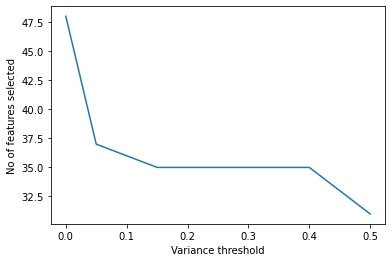

In [102]:
# define thresholds to check
thresholds = np.arange(0.0, 0.55, 0.05)

# apply transform with each threshold
results = list()
for t in thresholds:
    transform = VarianceThreshold(threshold=t)
    X_sel = transform.fit_transform(X)
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    results.append(n_features)

# plot the threshold vs the number of selected features
plt.plot(thresholds, results)
plt.xlabel('Variance threshold')
plt.ylabel('No of features selected')
plt.show()

### Univariate feature selection
*Univariate feature selection works by selecting the best features based on univariate statistical tests.*

**Methods in sklearn**
>**SelectKBest** removes all but the  highest scoring features
>
>**SelectPercentile** removes all but a user-specified highest scoring percentage of features


**These objects take as input a scoring function that returns univariate scores and p-values (or only scores for SelectKBest and SelectPercentile):**

>For regression: f_regression, mutual_info_regression
>
>For classification: chi2, f_classif, mutual_info_classif

*There are some **drawbacks** of using **F-Test** to select your features. F-Test checks for and only captures **linear relationships** between features and labels. A highly correlated feature is given higher score and less correlated features are given lower score. Correlation is highly deceptive as it doesn’t capture strong non-linear relationships.*

*On the other hand, **mutual information** methods can capture **any kind of statistical dependency**, but being non-parametric, they require more samples for accurate estimation. The function relies on **non-parametric methods based on entropy estimation from k-nearest neighbors distances***

In [103]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [104]:
## SelectKBest removes all but the  highest scoring features

X_new = SelectKBest(chi2, k=32).fit_transform(X, y)
X_new.shape

(1797, 32)

In [105]:
selector = SelectKBest(chi2, k='all').fit(X,y)
x_new = selector.transform(X) # not needed to get the score
scores = selector.scores_
scores

array([          nan,  811.90700411, 3501.28249552,  698.9252572 ,
        438.52969882, 3879.81925999, 3969.45823205, 1193.5608181 ,
         24.79521396, 2953.83108764, 2583.65198939,  388.24205944,
        824.69094853, 3676.48924765, 1983.5796061 ,  597.24198237,
          8.95886124, 1924.21690377, 2409.27140681, 3556.31594594,
       4871.94194551, 4782.19921618, 2155.17378998,  376.76583333,
          7.90090158, 2471.82418401, 4515.48149826, 2986.64314847,
       3724.09567634, 3208.64686641, 5138.07412439,   35.71270718,
                 nan, 5688.25079535, 5262.46646904, 3165.0605867 ,
       3231.63943369, 2532.99695611, 3288.81403655,           nan,
        142.85082873, 3863.85787901, 6416.0867248 , 5448.25154235,
       4079.73153383, 2134.02540236, 4486.34097862,  313.53898127,
         70.39927392,  449.72327313, 2801.97224468, 1527.54519627,
       1653.15892311, 3073.99803898, 5251.21748723,  683.88227339,
          9.15254237,  851.06791492, 3800.2473108 ,  730.92975

In [106]:
selector.pvalues_

array([            nan, 5.81310493e-169, 0.00000000e+000, 1.17740541e-144,
       8.11314242e-089, 0.00000000e+000, 0.00000000e+000, 2.97727113e-251,
       3.20626273e-003, 0.00000000e+000, 0.00000000e+000, 4.41344943e-078,
       1.02825052e-171, 0.00000000e+000, 0.00000000e+000, 8.18335060e-123,
       4.41080315e-001, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.23435651e-075,
       5.44163062e-001, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.45801029e-005,
                   nan, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000,             nan,
       2.65875300e-026, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.49452723e-062,
       1.27145348e-011, 3.28604761e-091, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [107]:
## SelectPercentile removes all but a user-specified highest scoring percentage of features

from sklearn.feature_selection import SelectPercentile
X_new1 = SelectPercentile(chi2, percentile=90).fit_transform(X, y)
X_new1.shape

(1797, 57)

### Feature Importance

*This process includes selecting the top important features using any of the estimator(model)*

**Method in sklearn**
>SelectFromModel

*SelectFromModel is a **little less robust** as it just removes less important features based on a threshold given as a parameter. There is no iteration involved.*

In [108]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectFromModel
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [109]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
#clf.feature_importances_ 

In [110]:
## using a already fitted model i.e. prefit=True

model = SelectFromModel(clf,threshold='median', prefit=True)
X_new = model.transform(X)
X_new.shape    

(1797, 32)

In [111]:
## Training the model within SelectFromModel object only i.e. prefit = False

selector = SelectFromModel(estimator=ExtraTreesClassifier(n_estimators=50),threshold=0.02,prefit=False).fit(X, y)
X_new = selector.transform(X)
X_new.shape

(1797, 27)

In [112]:
selector.threshold_

0.02

#### L1-based feature selection
*Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with feature_selection. SelectFromModel to select the non-zero coefficients. In particular, sparse estimators useful for this purpose are the linear_model.lasso for regression, and of linear_model.logisticRegression and svm.LinearSVC for classification.*

In [113]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(1797, 47)

### Recursive feature elimination

*Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.*

*First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.*


In [114]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [115]:
estimator = ExtraTreesClassifier(n_estimators=50)
selector = RFE(estimator, n_features_to_select=30, step=2)
selector = selector.fit(X, y)
X_new = selector.transform(X)
X_new.shape

(1797, 30)

In [116]:
selector.ranking_

array([18, 10,  1,  6,  6,  1,  7, 12, 13,  7,  1,  8,  3,  1,  9, 12, 15,
        8,  1,  1,  1,  1,  5, 13, 16,  4,  1,  1,  1,  1,  1, 14, 17,  1,
        1,  1,  1,  1,  1, 18, 16,  5,  1,  1,  1,  1,  2, 14, 15, 10,  1,
        1,  3,  1,  1, 11, 17, 11,  1,  4,  1,  1,  2,  9])

### Appendix
>https://machinelearningmastery.com/basic-data-cleaning-for-machine-learning/
>
>https://scikit-learn.org/stable/modules/preprocessing.html
>
>https://www.kaggle.com/dejavu23/titanic-eda-to-ml-beginner
>
>https://medium.com/bycodegarage/encoding-categorical-data-in-machine-learning-def03ccfbf40
>
>https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623
>
>https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff#:~:text=Normalization%20is%20useful%20when%20your,Gaussian%20(bell%20curve)%20distribution.
>
https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/normalize-data#:~:text=Normalization%20is%20a%20technique%20often,of%20values%20or%20losing%20information.
>
>https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0
>
>https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029
>
>https://www.geeksforgeeks.org/ml-chi-square-test-for-feature-selection/
>
>https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2
>
>https://medium.com/@swethalakshmanan14/outlier-detection-and-treatment-a-beginners-guide-c44af0699754#:~:text=One%20of%20the%20most%20important,times%20and%20less%20accurate%20models.
>
>https://towardsdatascience.com/getting-data-ready-for-modelling-feature-engineering-feature-selection-dimension-reduction-77f2b9fadc0b
>
>https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/
